<a href="https://colab.research.google.com/github/Josh2903/FYP/blob/main/1171103483_1750_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

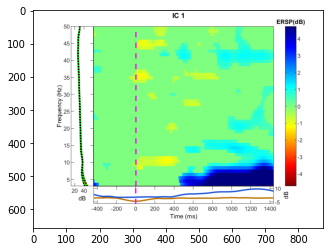

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd

DATADIR = "/content/drive/MyDrive/TIME_FREQ_IMG (1)"

# CATEGORIES = ["CON01LH_IMG", "CON01RH_IMG","DYS01L_IMG","DYS01R_IMG"]
CATEGORIES = ["CONTROL","DYSLEXIC"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
print(img_array.shape)

(656, 875, 3)


In [ ]:
IMG_SIZE = 100

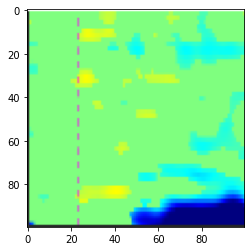

In [ ]:
new_array = img_array[45: 532, 179: 725]
new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
        new_array = img_array[45: 532, 179: 725]
        new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
        data.append([new_array, label])

In [ ]:
import random
random.shuffle(data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Create the Validation Dataset
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=42)# Create the Test and Final Training Datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, train_size=0.78, random_state=42)

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(358, 100, 100, 3) (102, 100, 100, 3) (358,) (102,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
vgg = VGG16(input_shape=[IMG_SIZE,IMG_SIZE] + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_4')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense( 2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
model.compile(#loss='binary_crossentropy',
              optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

In [ ]:
# Epochs
epochs = 10
# Batch size
batch_size = 32

history = model.fit( Xtrain, ytrain,
                    validation_data=(Xval, yval),
                    epochs=10,
                    steps_per_epoch= len(Xtrain)//batch_size,
                    validation_steps= len(Xval)//batch_size,
                    callbacks=callbacks,
                    verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)



Epoch 1: val_loss did not improve from 0.70320
11/11 - 40s - loss: 4.6490 - accuracy: 0.5391 - val_loss: 3.2700 - val_accuracy: 0.7500 - 40s/epoch - 4s/step
Epoch 2/10

Epoch 2: val_loss did not improve from 0.70320
11/11 - 39s - loss: 1.2741 - accuracy: 0.8492 - val_loss: 2.0429 - val_accuracy: 0.8654 - 39s/epoch - 4s/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.70320
11/11 - 39s - loss: 0.4006 - accuracy: 0.9358 - val_loss: 2.1406 - val_accuracy: 0.8269 - 39s/epoch - 4s/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.70320
11/11 - 39s - loss: 0.1239 - accuracy: 0.9749 - val_loss: 1.7105 - val_accuracy: 0.8654 - 39s/epoch - 4s/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.70320
11/11 - 39s - loss: 0.0249 - accuracy: 0.9860 - val_loss: 1.7728 - val_accuracy: 0.8846 - 39s/epoch - 4s/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.70320
11/11 - 39s - loss: 0.0632 - accuracy: 0.9804 - val_loss: 1.5722 - val_accuracy: 0.8654 - 39s/epoch - 4s/st

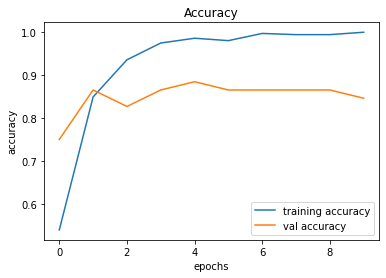

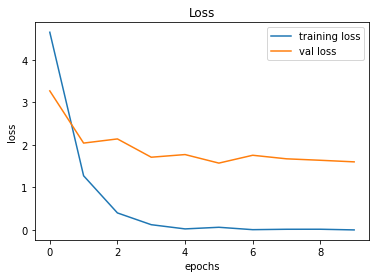

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save('mymodel.h5')

In [ ]:
new_model = tf.keras.models.load_model('mymodel.h5')

# Check its architecture
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
pred = np.argmax(new_model.predict(Xtest), axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytest,pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[50  2]
 [ 3 47]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score on test data : " ,accuracy_score(ytest, pred))

Accuracy score on test data :  0.9509803921568627


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.96      0.94      0.95        50

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102



Predicted Value :  1
Actual Value :  1


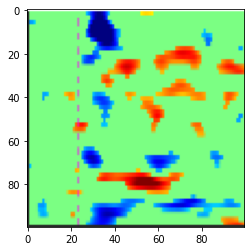

In [ ]:
i = 0

plt.imshow(Xtest[i])
print("Predicted Value : " ,pred[i])
print("Actual Value : " ,ytest[i])

Predicted Value :  0
Actual Value :  0


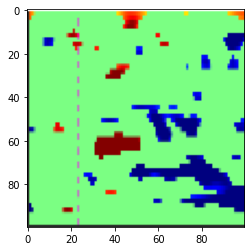

In [ ]:
i = 1

plt.imshow(Xtest[i])
print("Predicted Value : " ,pred[i])
print("Actual Value : " ,ytest[i])